In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
#mnist

mnist

In [2]:
X, y =mnist["data"], mnist['target']
X.shape

(70000, 784)

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y.shape

(70000,)

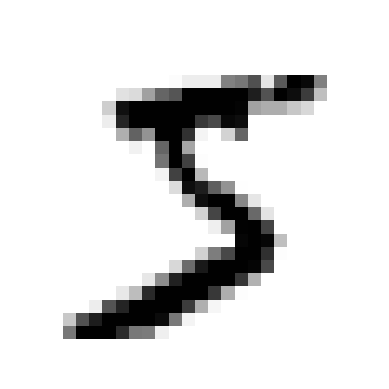

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[0].values
some_digit_image =some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
y_train.unique()

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train= X_train.iloc[shuffle_index].reset_index(drop=True),y_train.iloc[shuffle_index].reset_index(drop=True)

In [10]:
y_train.unique()

['0', '9', '1', '5', '4', '6', '3', '8', '7', '2']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
y_train_5 = (y_train == '5')
y_test_5  = (y_test  == '5')

In [12]:
y_train_5.unique()

array([False,  True])

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5, cv=3,scoring="accuracy")

array([0.968 , 0.9473, 0.9663])

In [15]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf=Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring= "accuracy")

array([0.91005, 0.9093 , 0.9096 ])

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53459,  1120],
       [ 1248,  4173]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7883997732854714

In [18]:
recall_score(y_train_5, y_train_pred)

0.7697841726618705

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7789807728206085

In [20]:
y_scores= sgd_clf.decision_function([some_digit])
y_scores

C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([4526.91476361])

In [21]:
threshold=0
y_some_digit_pred= (y_scores > threshold)
y_some_digit_pred

array([ True])

In [22]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

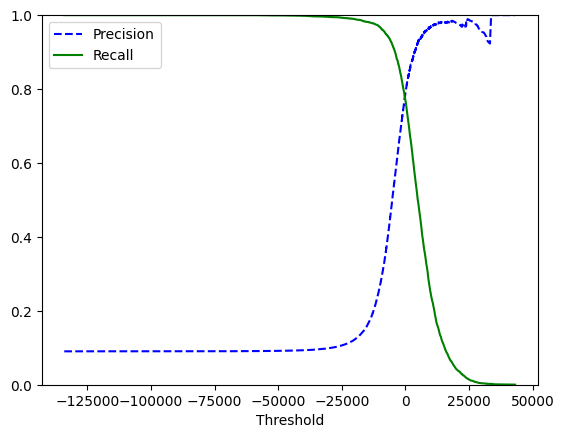

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds,recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls, thresholds)
plt.show()

In [26]:
y_train_pred_90 = (y_scores> 70000)
precision_score(y_train_5, y_train_pred_90)

C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [27]:
recall_score(y_train_5, y_train_pred_90)

0.0

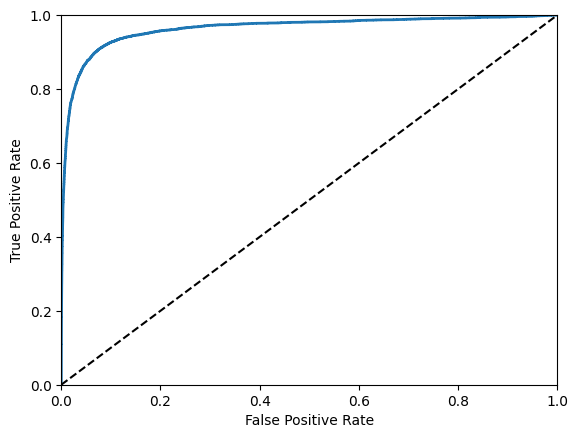

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9637365905659466

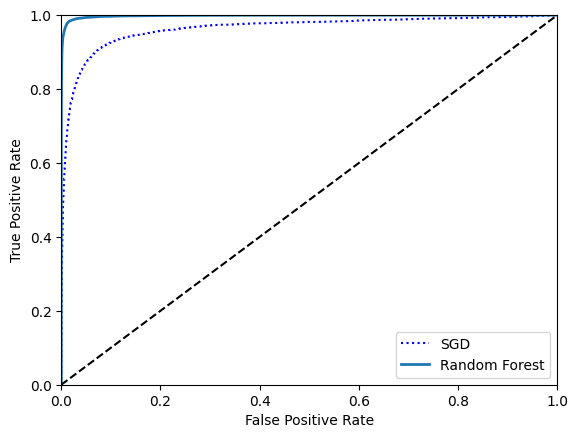

0.9983575557897171

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state= 42)
y_probas_forest = cross_val_predict(forest_clf,X_train, y_train_5, cv = 3, 
                                   method=  "predict_proba")

y_scores_forest  = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
roc_auc_score(y_train_5, y_scores_forest)

In [34]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype='<U1')

In [35]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])


C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [36]:
len(ovo_clf.estimators_)

45

In [37]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [38]:
forest_clf.predict_proba([some_digit])

C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.02, 0.1 , 0.  , 0.85, 0.  , 0.01, 0.02, 0.  ]])

In [39]:
cross_val_score(sgd_clf, X_train, y_train, cv=3 , scoring="accuracy")

array([0.8506 , 0.88255, 0.87415])

In [41]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3 , scoring= "accuracy")

C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.89785, 0.9037 , 0.9051 ])

In [42]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\brand\anaconda3\envs\New_Env_02_2024\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5611,    0,   14,   11,    9,   44,   34,    3,  196,    1],
       [   1, 6414,   44,   28,    4,   43,    4,   11,  181,   12],
       [  26,   26, 5263,   96,   71,   24,   71,   43,  324,   14],
       [  28,   22,  116, 5273,    1,  199,   27,   45,  354,   66],
       [  13,   14,   47,   12, 5250,   11,   39,   22,  267,  167],
       [  30,   16,   30,  164,   54, 4497,   77,   20,  465,   68],
       [  29,   20,   53,    4,   41,   92, 5544,    7,  127,    1],
       [  20,   11,   50,   27,   53,   11,    4, 5706,  164,  219],
       [  18,   61,   38,  101,    3,  120,   29,    7, 5421,   53],
       [  24,   20,   31,   63,  126,   40,    1,  176,  314, 5154]],
      dtype=int64)

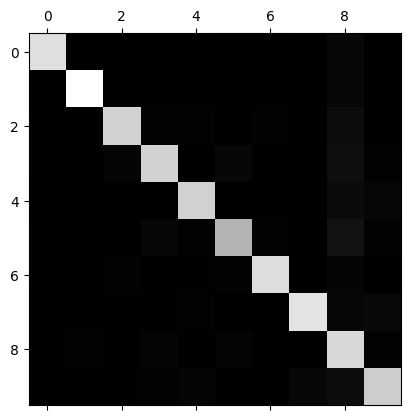

In [43]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

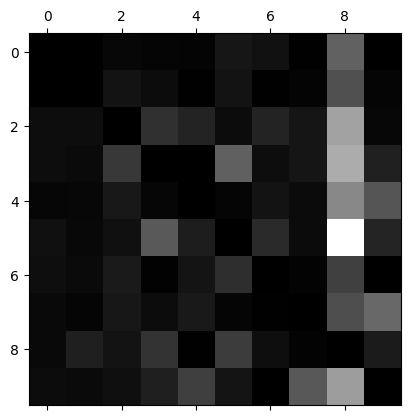

In [44]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx= conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [49]:
y_train

0        0
1        9
2        1
3        0
4        5
        ..
59995    3
59996    7
59997    5
59998    9
59999    7
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

TypeError: unsupported operand type(s) for %: 'Categorical' and 'int'